In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np

In [3]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 유의미한 변수:
OverallQual: Overall material and finish quality

YearBuilt: Original construction date

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

#### 느낀점:
As he said, it's interesting that columns related to location are not included in the list above

#### insight:
For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

# 1. Exploring data through various graphs

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### seaborn으로 histogram 그리는 법:

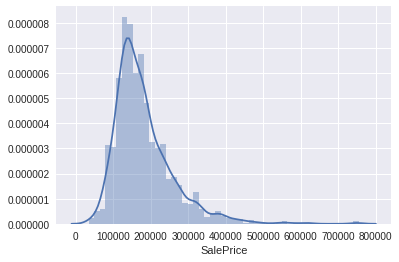

In [8]:
sns.distplot(df_train['SalePrice'])

데이터 특징:
오른쪽으로 skewed, peak있음 + Deviate from the normal distribution.

#### skew랑 kurt 수치 (?) 보는법:

In [9]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### relationship with numerical variables

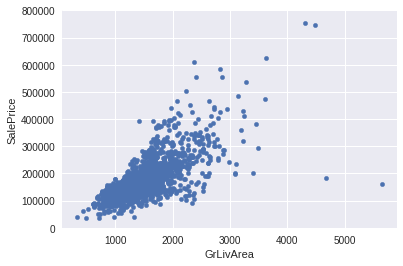

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

outlier가 있지만 선형성을 보이는 거 같음

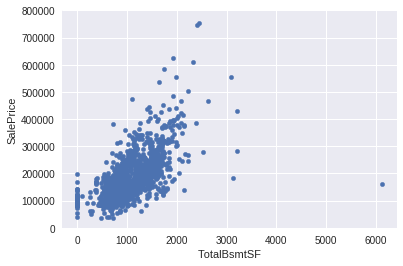

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

더 강한 선형성을 보이는 거 같음

### Relationship with categorical features

(-0.5, 9.5, 0, 800000)

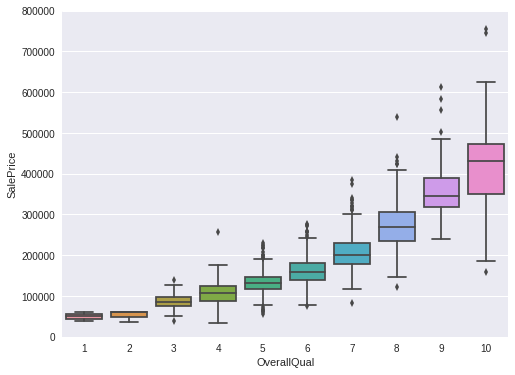

In [13]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

overall quality가 높아질수록 가격도 상승

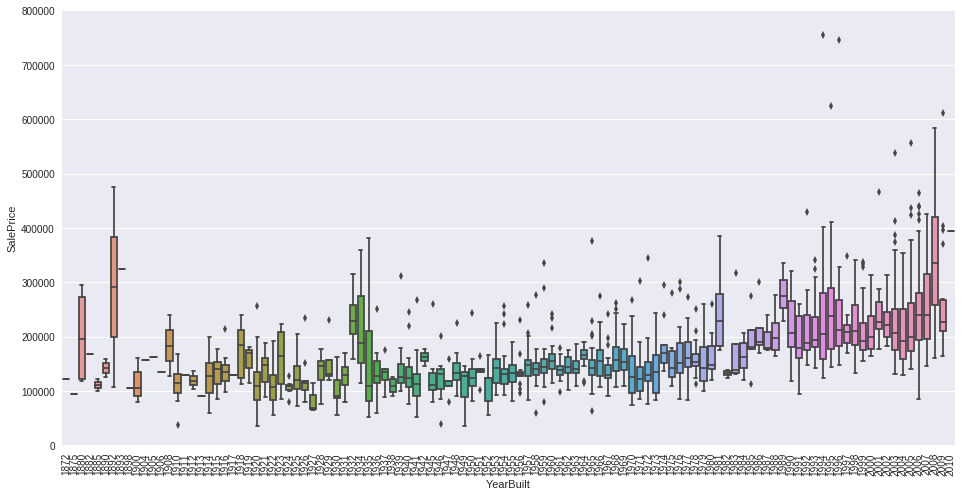

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

#### insight: 
inflation을 감안해야한다는 것: 시간이 지날수록 가격이 상승세를 보이는데, 이게 inflation 때문인지 정말 시간이 지날수록 집값 자체가 오른건지 모르기 때문

### Correlation matrix: heatmap style

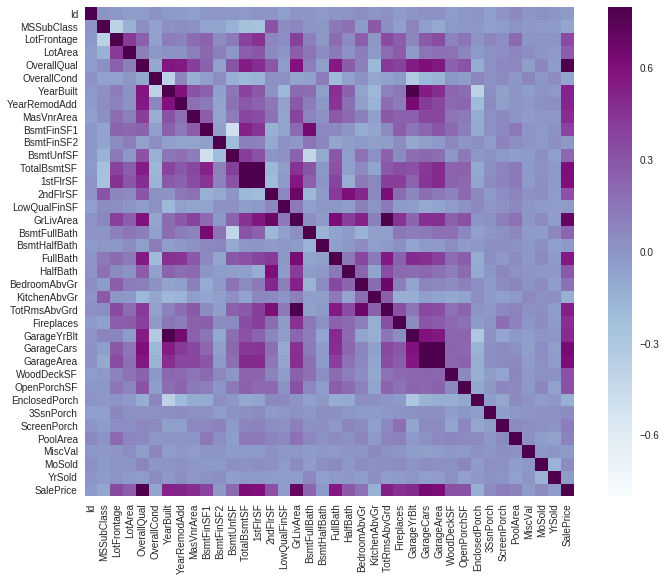

In [17]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="BuPu")

### 'SalePrice' correlation matrix (zoomed heatmap style)

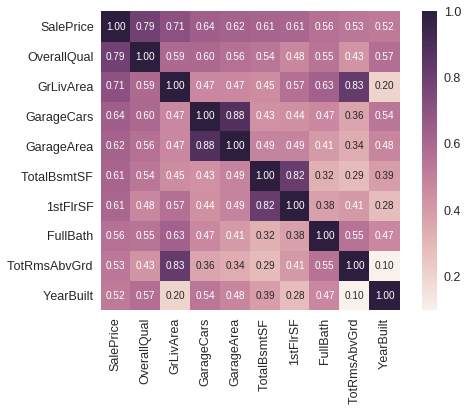

In [18]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 새로 발견된 유의미한 변수들:
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

--> garage area가 넓을수록 garage cars도 증가함. 둘 중 하나만 사용해도 됨

1stFlrSF와 TotalBsmtSF도 "twin brothers" --> 하나만 사용

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) --> 이것도 GrLivArea와 "twin brother"

### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

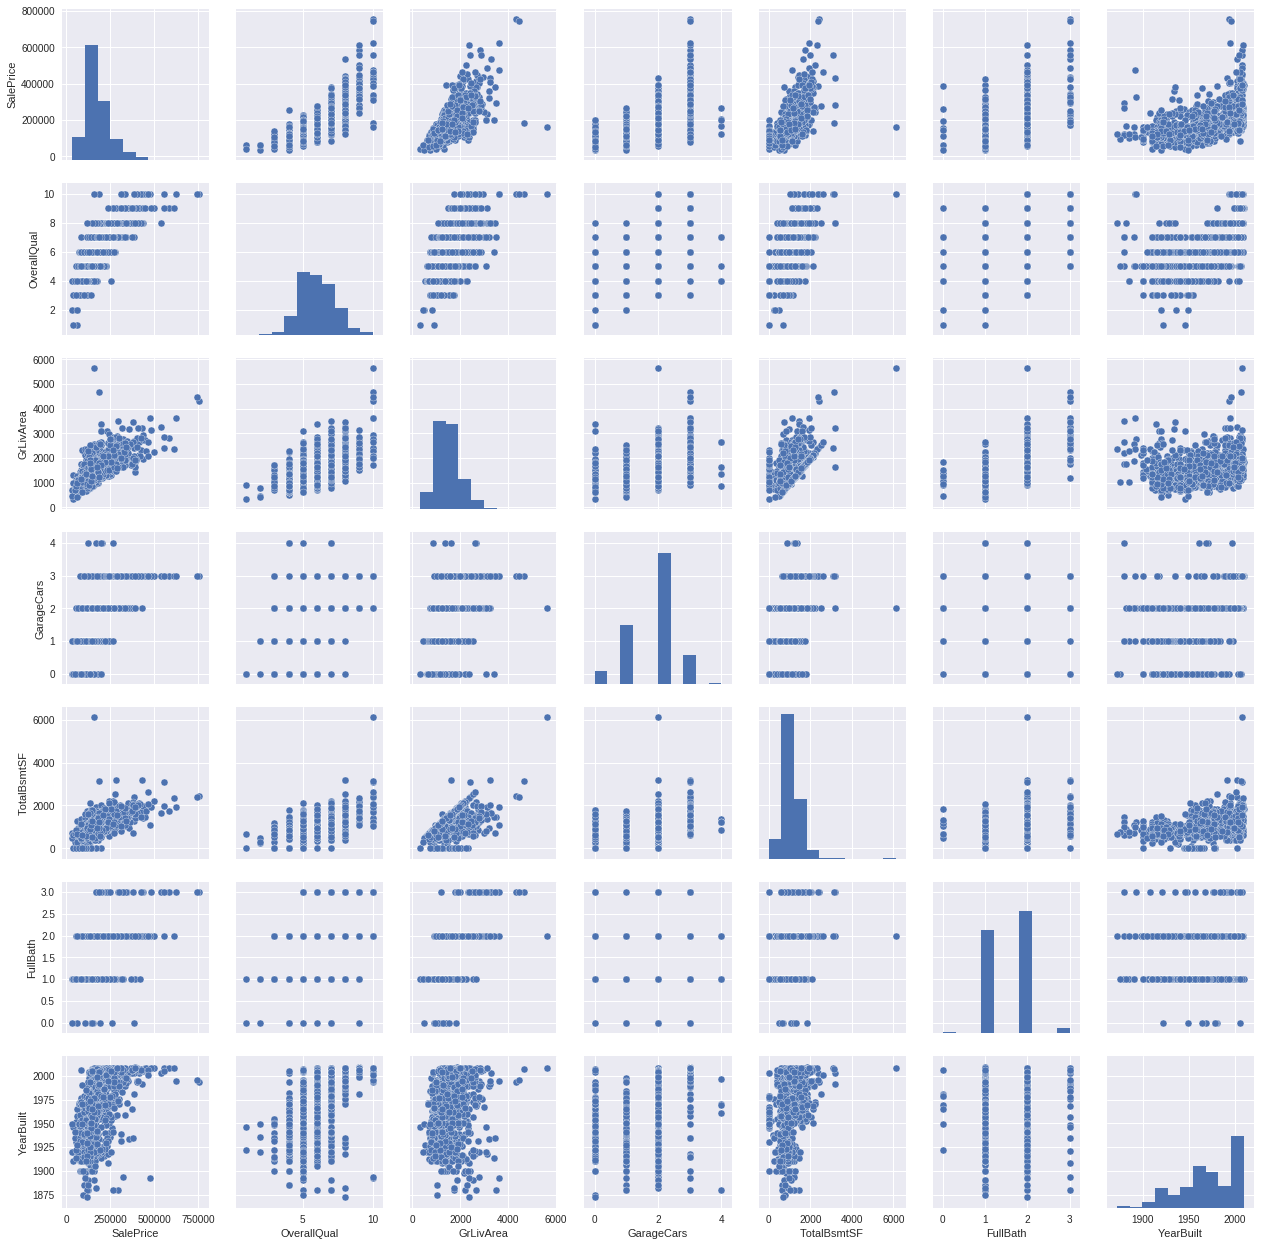

In [19]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

#### insight:
TotalBsmtSF > GrLiveArea..

why? "It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area"

# 2. Missing data

#### 도움될만한 것:
Important questions when thinking about missing data:

1) How prevalent is the missing data?

2) Is missing data random or does it have a pattern?

In [20]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### tip! 
We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.

이렇게 기준을 정해놓고 결측치를 무시하는 방법 있음

#### tip! 2
Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

데이터간 상관관계를 고려해서 불필요한 variable을 걸러낼 수 있다

In [21]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# 3. Outliers

### 3-1 Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data.

짱신기

In [22]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


### 3-2 Bivariate analysis

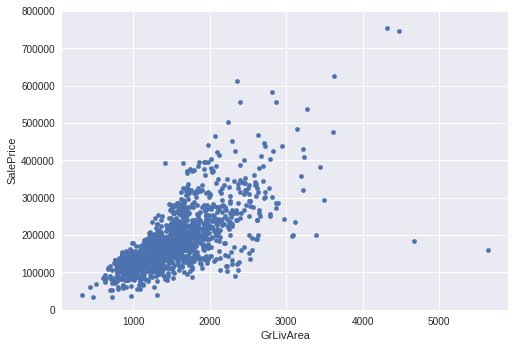

In [23]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [24]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

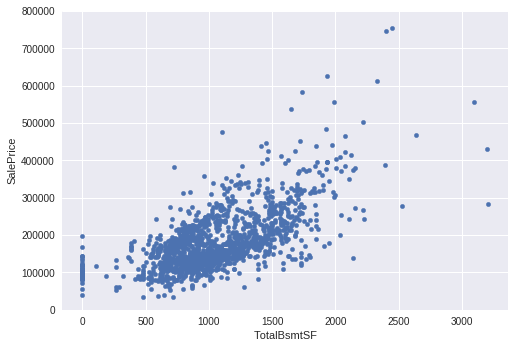

In [25]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 4. "Getting hard core"

#### tip!
statistical assumptions that enables us to apply multivariate techniques: normality, Homoscedasticity, Linearity, Absence of correlated errors

#### 1) Normality:
* The data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics).
* Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps.
* Another detail to take into account is that in big samples (>200 observations) normality is not such an issue.

#### 2) Homoscedasticity:
* Assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)
* Desirable because we want the error term to be the same across all values of the independent variables.

#### 3) Linearity:
* The most common way to assess linearity: to examine scatter plots and search for linear patterns.
* If patterns are not linear, it would be worthwhile to explore data transformations.

#### 4) Absence of correlated errors
* Happen when one error is correlated to another.
* ex) if one positive error makes a negative error systematically, it means that there's a relationship between these variables.
* Occurs often in time series,where some patterns are time related.

## 4-1) Normality:

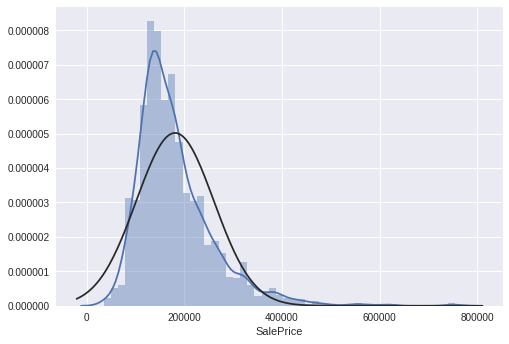

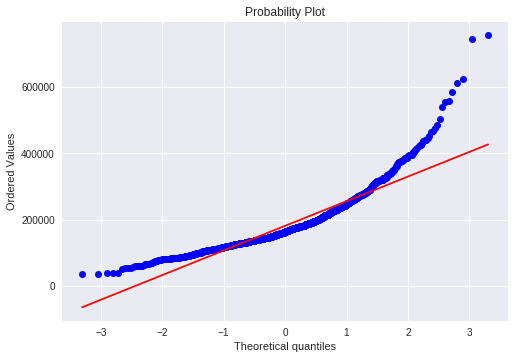

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Not normal, peak 존재, positive skewness, does not follow the diagonal line

#### data transformation 통해 해결

In [27]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

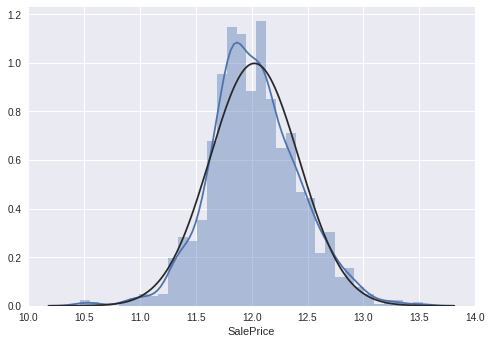

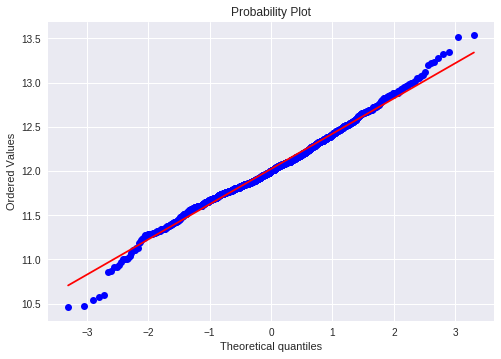

In [28]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

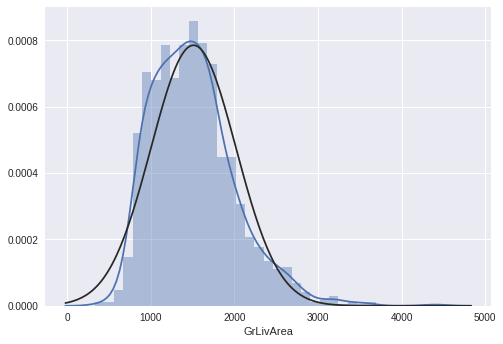

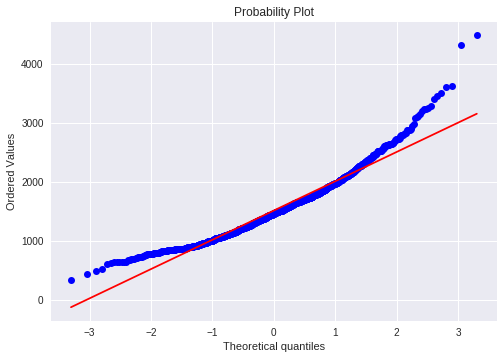

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

이것도 skew됨 --> transformation needed!

In [30]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

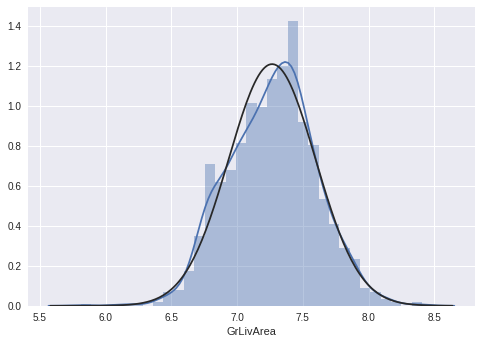

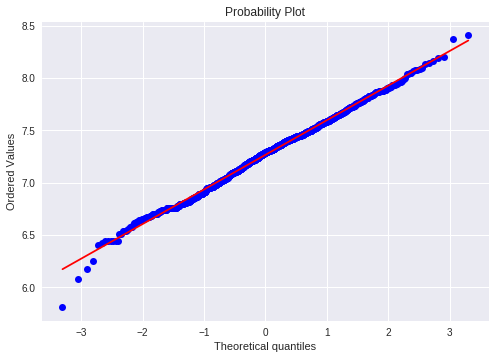

In [31]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

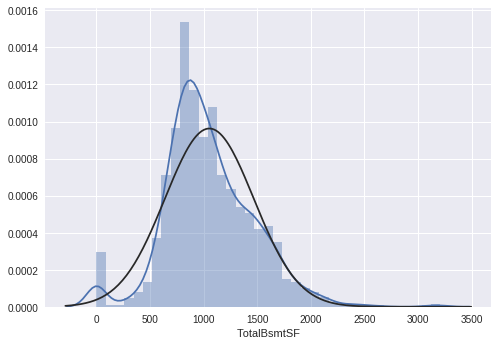

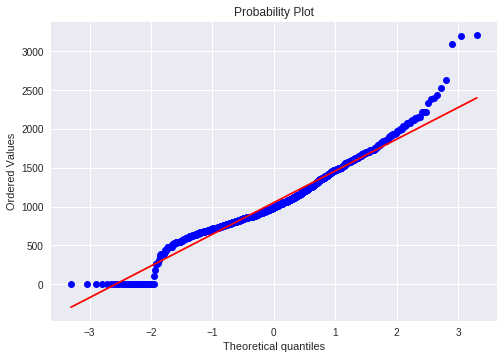

In [32]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

문제: skewness, observations with value zero

값이 0이 왜 문제? log transformation을 못함

해결법: To apply a log transformation here, 
* we'll create a variable that can get the effect of having or not having basement (binary variable). 
* Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 
* This way we can transform data, without losing the effect of having or not basement.

In [33]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [34]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

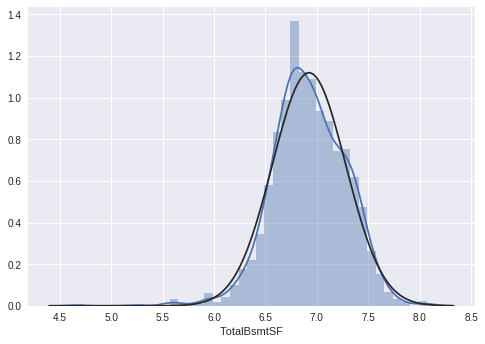

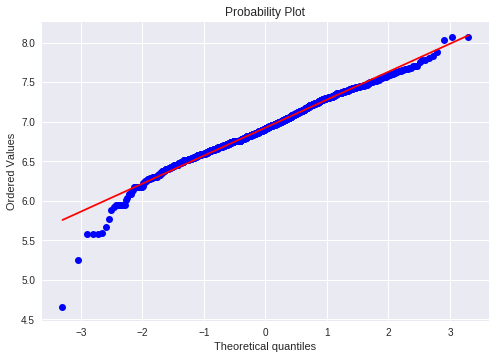

In [35]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## 4-2) homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. 

Departures from an equal dispersion are shown by such shapes as 
* cones (small dispersion at one side of the graph, large dispersion at the opposite side) 

or 
* diamonds (a large number of points at the center of the distribution).

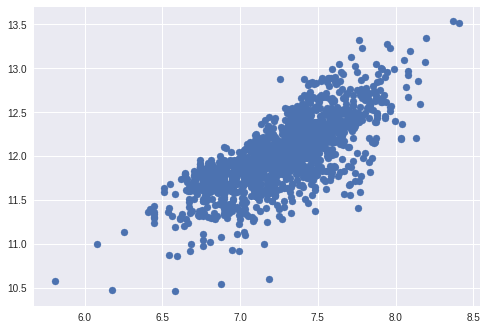

In [36]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

normality로 조정하느라 conic shape이 사라짐

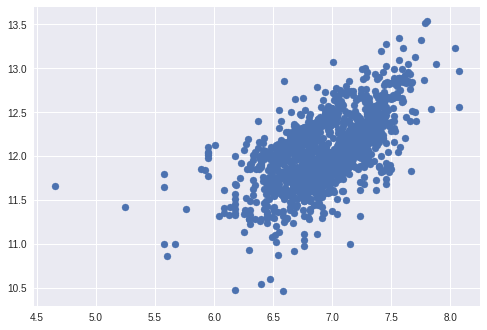

In [37]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

## Dummy 변수

In [38]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

-----------------------------

# 새로 알게 된 것:
* 통계적 assumptions 들을 고려해야 한다는 것
* normalize 하는 법
* skewness와 kurtosis 값(?) 보는 법
* homoscedasticity와 cone 모양, diamond 모양을 따라야한다는 것 (아직 이해를 완전히 하지는 못했음)
* 0 값이 있을 때 log transformation 하는 법
* normality 확인할 때 그 대각선과 같이 그려서 비교하면 보기 편하다는 것!
* bell curve 그릴 때 그 선(?)이랑 같이 그리는 거